In [0]:
import sklearn.datasets
import numpy as np

In [0]:
breast_cancer = sklearn.datasets.load_breast_cancer()

In [0]:
X =breast_cancer.data
Y = breast_cancer.target

In [94]:
X.shape

(569, 30)

In [95]:
Y.shape

(569,)

In [0]:
import pandas as pd


In [0]:
df = pd.DataFrame(breast_cancer.data,columns=breast_cancer.feature_names)

In [98]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [99]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [0]:
df['class'] = breast_cancer.target

In [101]:
df['class'].value_counts()

1    357
0    212
Name: class, dtype: int64

In [102]:
df.groupby('class').mean()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
class,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,0.609083,1.210915,4.323929,72.672406,0.006780,0.032281,0.041824,0.015060,0.020472,0.004062,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530
1,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,0.284082,1.220380,2.000321,21.135148,0.007196,0.021438,0.025997,0.009858,0.020584,0.003636,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442


In [0]:
X = df.drop('class',axis=1)
Y = df['class']

In [104]:
Y

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: class, Length: 569, dtype: int64

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y)

In [107]:
print(X_train.shape,X_test.shape,Y_train.shape,Y_test.shape)

(426, 30) (143, 30) (426,) (143,)


In [108]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=.1,stratify=Y,random_state=1)
print(X_train.mean(),X_test.mean(),Y_train.mean(),Y_test.mean())
print("llllllllllllllllllllll")
print(Y_train.mean(),Y_test.mean())

mean radius                 14.058656
mean texture                19.309668
mean perimeter              91.530488
mean area                  648.097266
mean smoothness              0.096568
mean compactness             0.105144
mean concavity               0.089342
mean concave points          0.048892
mean symmetry                0.181961
mean fractal dimension       0.062979
radius error                 0.403659
texture error                1.206856
perimeter error              2.861173
area error                  39.935506
smoothness error             0.007067
compactness error            0.025681
concavity error              0.032328
concave points error         0.011963
symmetry error               0.020584
fractal dimension error      0.003815
worst radius                16.194275
worst texture               25.644902
worst perimeter            106.757715
worst area                 871.647852
worst smoothness             0.132592
worst compactness            0.257415
worst concav

Binarisation

In [0]:
import matplotlib.pyplot as plt


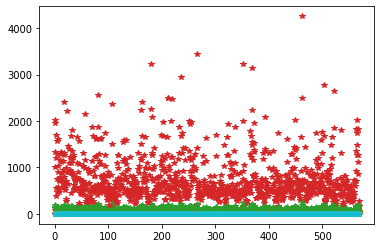

In [125]:
plt.plot(X_train,'*')
plt.show()

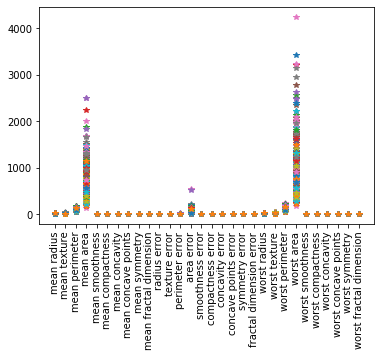

In [124]:
plt.plot(X_train.T,'*')
plt.xticks(rotation='vertical')
plt.show()

In [0]:
X_binarised_train = X_train.apply(pd.cut,bins=2,labels=[1,0])

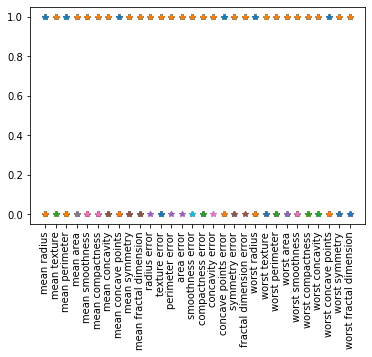

In [113]:
plt.plot(X_binarised_train.T,'*')
plt.xticks(rotation='vertical')
plt.show()



In [0]:
X_binarised_test = X_test.apply(pd.cut,bins=2,labels=[1,0])

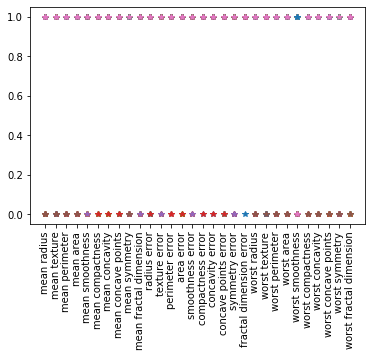

In [115]:
plt.plot(X_binarised_test.T,'*')
plt.xticks(rotation='vertical')
plt.show()

In [0]:
X_binarised_test = X_binarised_test.values
X_binarised_train =X_binarised_train.values

In [0]:
from random import randint

In [118]:
 b= 28
i=randint(0,X_binarised_train.shape[0])

if (np.sum(X_binarised_train[i,:])>=b):
  print('Mp Nuron is malignant')
else:
  print('Mp nuron is benign')

if(Y_train[i]==1):
  print('Ground truth is malignant')
else:
  print('Ground truth is benign')


Mp Nuron is malignant
Ground truth is malignant


In [122]:

for b in range(0,X_binarised_train.shape[1]+1):
  Y_pred_train=[]
  accurate_rows=0
  for x,y in zip(X_binarised_train,Y_train):
    y_pred = (np.sum(x)>=b)
    #print(y_pred)
    #print(y)
    Y_pred_train.append(y_pred)
    accurate_rows+=(y==y_pred)

  print(b,accurate_rows/X_binarised_train.shape[0])


0 0.626953125
1 0.626953125
2 0.626953125
3 0.626953125
4 0.626953125
5 0.626953125
6 0.626953125
7 0.626953125
8 0.626953125
9 0.626953125
10 0.626953125
11 0.626953125
12 0.626953125
13 0.626953125
14 0.630859375
15 0.6328125
16 0.642578125
17 0.6484375
18 0.65625
19 0.6640625
20 0.671875
21 0.6875
22 0.701171875
23 0.724609375
24 0.755859375
25 0.78515625
26 0.818359375
27 0.845703125
28 0.849609375
29 0.814453125
30 0.759765625


No we validate the model on Test data

In [127]:
from sklearn.metrics import accuracy_score
b=28
Y_pred_test=[]
for x in X_binarised_test:
  y_pred = (np.sum(x)>=b)
  Y_pred_test.append(y_pred)

accuray = accuracy_score(Y_pred_test,Y_test)
print(b,accuray)

28 0.7894736842105263


MP_Nuron Class

In [0]:
class MPNeuron:
  def __init__(self):
    self.b=None

  def model(self,x):
    return ((sum(x)>=self.b)) 
  
  def predict(self,X):
    Y=[]
    for x in X:
      result = self.model(x)
      Y.append(result)
    return np.array(Y)

  def fit(self,X,Y):
    accuracy={}
    for b in range(0,(X.shape[1]+1)):
      self.b=b
      Y_pred = self.predict(X)
      accuracy[b] = accuracy_score(Y_pred,Y)
    best_b =max(accuracy,key=accuracy.get)
    self.b = best_b
    print('Optimal value of b',best_b)
    print('Highest accuracy of the model',accuracy[best_b])

In [132]:
mp_nuron = MPNeuron()
mp_nuron.fit(X_binarised_train,Y_train)

Optimal value of b 28
Highest accracy of the model 0.849609375


In [133]:
Y_test_pred = mp_nuron.predict(X_binarised_test)
accuracy_test = accuracy_score(Y_test_pred,Y_test)
print(accuracy_test)

0.7894736842105263
